In [1]:
import vaex
# from vaex.ui.colormaps import cm_plusmin

import numpy as np
import pylab as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
# Read in the data from disk
# df = vaex.open('./green_tripdata.hdf5')
df = vaex.open('./assignment_2/green_tripdata.hdf5')

[#---------------------------------------] 100.00% elapsed time  :     0.06s =  0.0m =  0.0h
 

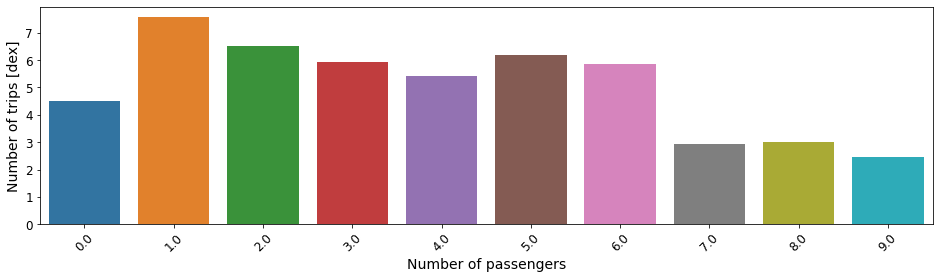

In [4]:
# Get number of unique trips with certain number of passengers
num_passengers = df.passenger_count.value_counts(progress=True)

# Plot the result
plt.figure(figsize=(16, 4))
sns.barplot(x=num_passengers.index, y=np.log10(num_passengers.values))
plt.xlabel('Number of passengers')
plt.ylabel('Number of trips [dex]')
plt.xticks(rotation='45')
plt.show()

In [5]:
# Filterd based on the number of passengers
df_filtered = df[(df.trip_distance<=100) & (df.passenger_count<=10)]

In [6]:
df_filtered = df_filtered[df_filtered.pickup_latitude.notna()]
df_filtered = df_filtered[df_filtered.pickup_latitude!=0]
df_filtered = df_filtered[df_filtered.pickup_longitude.notna()]
df_filtered = df_filtered[df_filtered.pickup_longitude!=0]
df_filtered = df_filtered[df_filtered.dropoff_latitude.notna()]
df_filtered = df_filtered[df_filtered.dropoff_latitude!=0]
df_filtered = df_filtered[df_filtered.dropoff_longitude.notna()]
df_filtered = df_filtered[df_filtered.dropoff_longitude!=0]

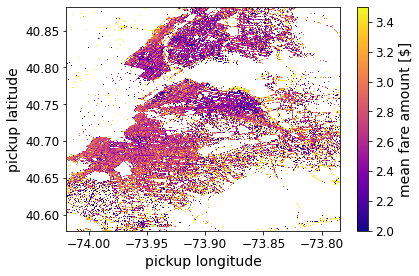

In [7]:
plt.figure()
df_filtered.plot('pickup_longitude', 'pickup_latitude',what='mean(fare_amount)',
                 colormap='plasma',f='log1p', shape=512, colorbar=True,
                 colorbar_label='mean fare amount [$]', vmin=2, vmax=3.5)

plt.xlabel('pickup longitude')
plt.ylabel('pickup latitude')
plt.show()

In [8]:
# arc-distance in miles
def arc_distance(theta_1, phi_1, theta_2, phi_2):
    temp = (np.sin((theta_2-theta_1)/2*np.pi/180)**2
           + np.cos(theta_1*np.pi/180)*np.cos(theta_2*np.pi/180) * np.sin((phi_2-phi_1)/2*np.pi/180)**2)
    distance = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1-temp))
    return distance * 3958.8

# Expression to be pre-compiled with numba, and then executed
df_filtered['arc_distance'] = arc_distance(df_filtered.pickup_longitude, 
                                           df_filtered.pickup_latitude, 
                                           df_filtered.dropoff_longitude, 
                                           df_filtered.dropoff_latitude).jit_numba()

[#---------------------------------------] 100.00% elapsed time  :     0.03s =  0.0m =  0.0h
[#---------------------------------------] 100.00% elapsed time  :     0.21s =  0.0m =  0.0h
 

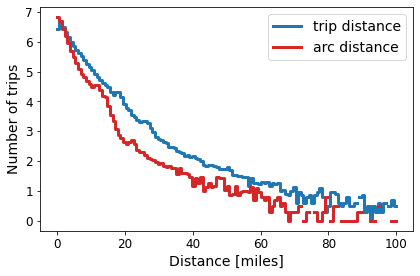

In [9]:
plt.figure()
df_filtered.plot1d('trip_distance', shape=128, limits=[0, 100], lw=3, f='log10', color='C0', 
                   label='trip distance', progress=True)
df_filtered.plot1d('arc_distance', shape=128, limits=[0, 100], lw=3, f='log10', color='C3', 
                   label='arc distance', progress=True)
plt.legend(fontsize=14)
plt.xlabel('Distance [miles]')
plt.ylabel('Number of trips')
plt.show()